In [1]:
exec(open("../header.py", "r").read())

In [2]:
from sklearn.preprocessing import scale
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [3]:
data = pd.read_csv(data_path/"wine.dat")

In [4]:
data.iloc[:, 1:] = data.iloc[:, 1:].astype("float")

In [5]:
data.head()

,Grape,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,1,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,1,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,1,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [6]:
folds = KFold(n_splits=5, shuffle=True, random_state=42)

*** OUTPUT (output/01_denorm_best_k-1.dat) ***
1
*** OUTPUT (output/01_denorm_best_k-2.dat) ***
0.73


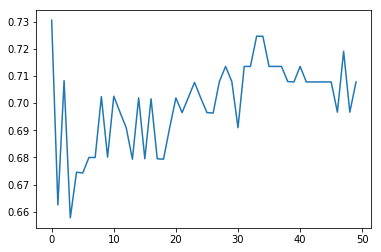

In [7]:
@answer
def denorm_best_k(fout=2):
    res = []
    for k in range(1, 51):
        score = cross_val_score(KNeighborsClassifier(k), data.iloc[:, 1:], data.iloc[:, 0], cv=folds).mean()
        res.append(score)
    res = sp.array(res)
    fout[0].write(f"{sp.argmax(res)+1}")
    fout[1].write(f"{sp.amax(res):.2f}")
    plt.plot(res)
denorm_best_k()

*** OUTPUT (output/02_norm_best_k-1.dat) ***
29
*** OUTPUT (output/02_norm_best_k-2.dat) ***
0.98


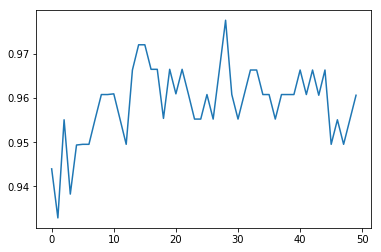

In [8]:
@answer
def norm_best_k(fout=2):
    res = []
    for k in range(1, 51):
        score = cross_val_score(KNeighborsClassifier(k)
                               ,scale(data.iloc[:, 1:])
                               ,data.iloc[:, 0]
                               ,cv=folds).mean()
        res.append(score)
    res = sp.array(res)
    fout[0].write(f"{sp.argmax(res)+1}")
    fout[1].write(f"{sp.amax(res):.2f}")
    plt.plot(res)
norm_best_k()